# **PROJECT**

## **Project Tittle: Student Mental Health Prediction**

### Team Members

| Student Name                    | Student ID ||
|---------------------------------|------------|--------------------------------------------------------|
| Muhammad Faris Bin Shaik Mohamed| 1181202007 ||
| Muhammad Irfan Bin Nasir Khan   | 1191101753 ||
| Muhammad Yazid Bin Yunos        | 1191202305 ||

## Dataset

We used 2020 Student Mental Health Malaysia dataset from [Kaggle](https://www.kaggle.com/datasets/shariful07/student-mental-health)

### Explanation of dataset column:-
- Timestamp: The date and time when the survey response was recorded.
- Choose your gender: The gender of the student (Male or Female).
- Age: The age of the student.
- What is your course?: The course or major the student is enrolled in (e.g., Engineering, BIT, Laws, etc.).
- Your current year of Study: The current academic year of the student (e.g., Year 1, Year 2, Year 3, Year 4).
- What is your CGPA?: The cumulative grade point average of the student, categorized into ranges (e.g., 0 - 1.99, 2.00 - 2.49, 3.00 - 3.49, 3.50 - 4.00).
- Marital status: The marital status of the student (Yes or No).
- Do you have Depression?: Whether the student has depression (Yes or No).
- Do you have Anxiety?: Whether the student has anxiety (Yes or No).
- Do you have Panic attack?: Whether the student has panic attacks (Yes or No).
- Did you seek any specialist for a treatment?: Whether the student sought specialist treatment for their mental health issues (Yes or No).


___
## Import Libraries

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.utils import resample

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Define the file path to your dataset
file_path = "/content/drive/My Drive/Machine Learning/Student Mental health.csv"

# Load the dataset
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
data.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
First few rows of the dataset:


,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


___
## Data Pre-Processing

Step 1: Find and count number of missing values in the dataset.

Step 2: Drop column that have missing values, reason is those column are not useful for the prediction.

Step 3: Convert all categorical variable into numerical variable.

Step 4: Create labelling for "Do you have Depression?", "Do you have Anxiety?", "Do you have Panic attack?" column. Where 1 is Yes, 0 is No.

In [ ]:
# Check for missing values
print("Missing values in each column:")
print(data.isnull().sum())

# Handle missing values (if any)
data = data.dropna()  # For simplicity, we drop rows with missing values

# Convert categorical variables to numeric using Label Encoding
le = LabelEncoder()
for column in data.select_dtypes(include=['object']).columns:
    data[column] = le.fit_transform(data[column])

# Add label columns for 'Do you have Depression?', 'Do you have Anxiety?', 'Do you have Panic attack?'
data['depression_label'] = data['Do you have Depression?'].apply(lambda x: 'Yes' if x == 1 else 'No')
data['anxiety_label'] = data['Do you have Anxiety?'].apply(lambda x: 'Yes' if x == 1 else 'No')
data['panic_attack_label'] = data['Do you have Panic attack?'].apply(lambda x: 'Yes' if x == 1 else 'No')

# Display the dataset with new label columns
print("Dataset with label columns:")
data.head()


Missing values in each column:
Timestamp                                       0
Choose your gender                              0
Age                                             1
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64
Dataset with label columns:


<ipython-input-4-6c987555e64a>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = le.fit_transform(data[column])
<ipython-input-4-6c987555e64a>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = le.fit_transform(data[column])
<ipython-input-4-6c987555e64a>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?,depression_label,anxiety_label,panic_attack_label
0,23,0,18.0,17,3,3,0,1,0,1,0,Yes,No,Yes
1,24,1,21.0,25,4,3,0,0,1,0,0,No,Yes,No
2,25,1,19.0,4,0,3,0,1,1,1,0,Yes,Yes,Yes
3,26,0,22.0,33,5,3,1,1,0,0,0,Yes,No,No
4,27,1,23.0,37,6,3,0,0,0,0,0,No,No,No


## Visualizations

Below code will plot Histogram with line where it consist of:
- Distribution of all column after label encoding.
- Correlation heatmap for each features.
- Bar chart of imbalance data, and after balance data.

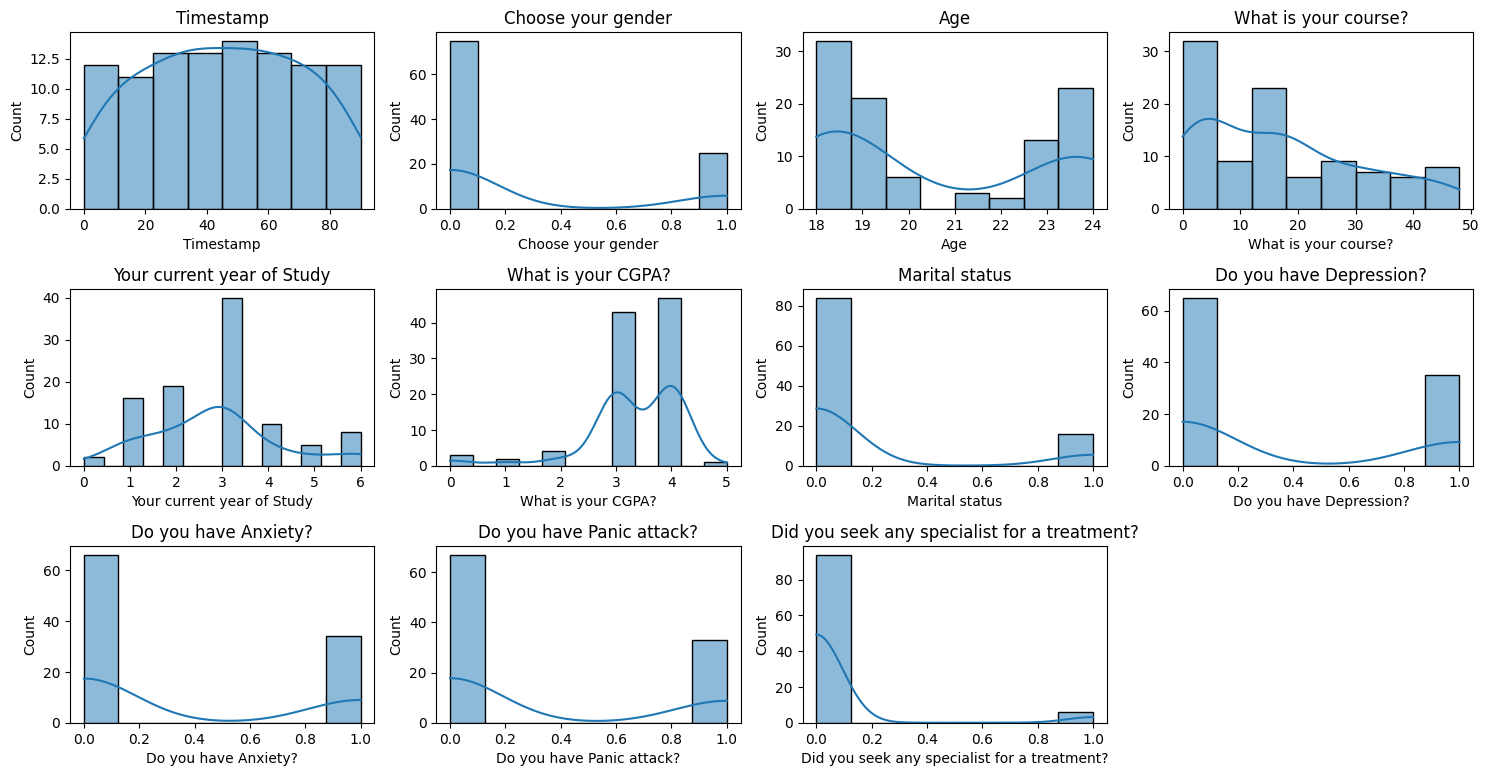

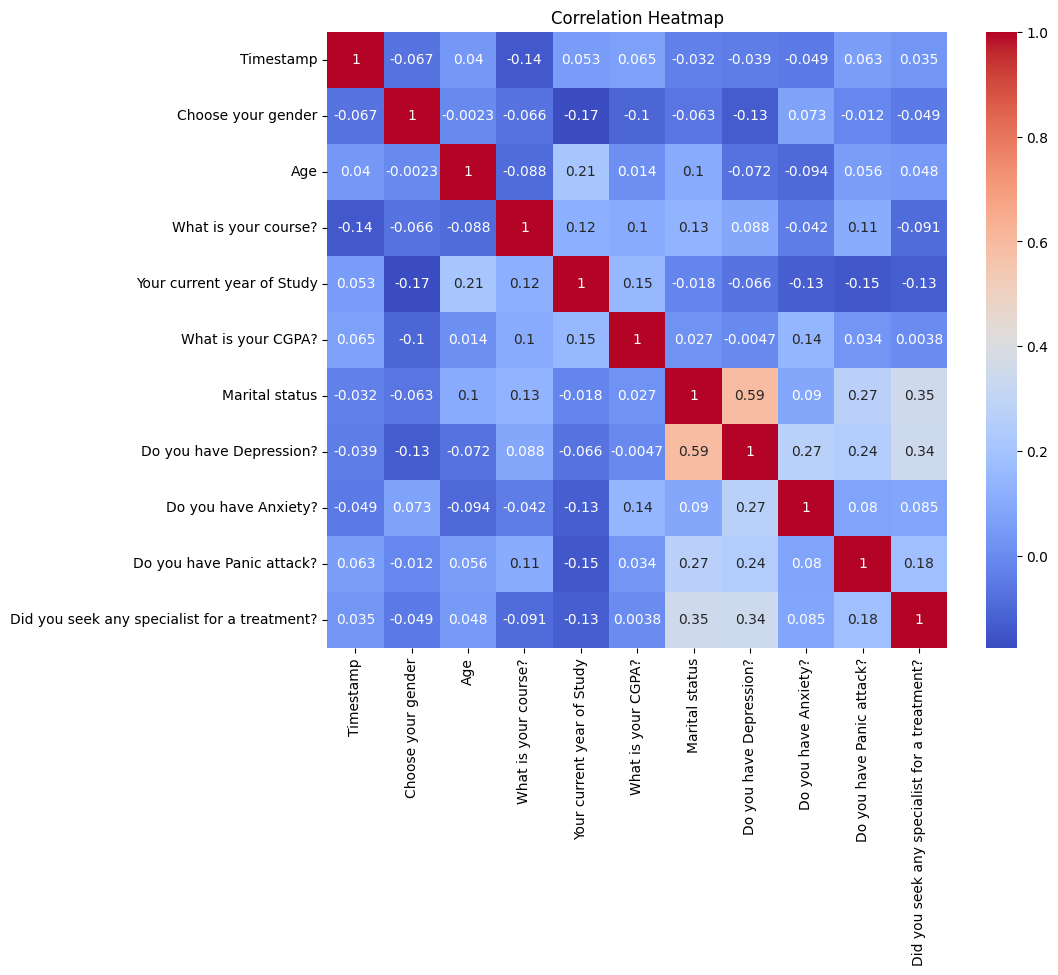

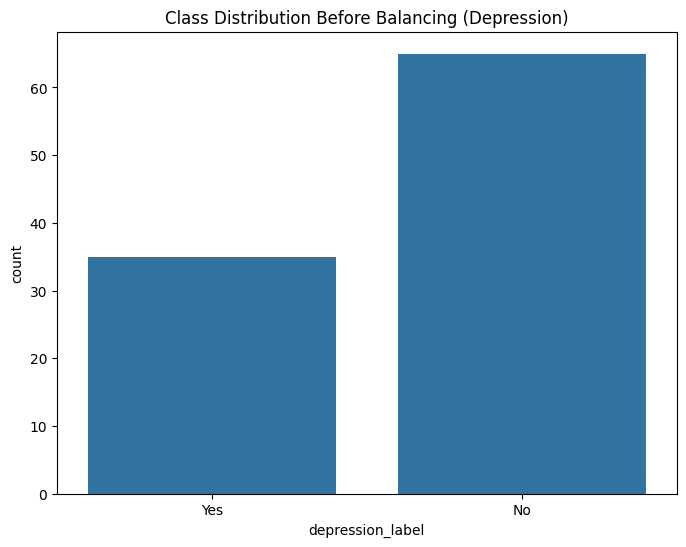

Class distribution after balancing (Depression):
Do you have Depression?
0    65
1    65
Name: count, dtype: int64


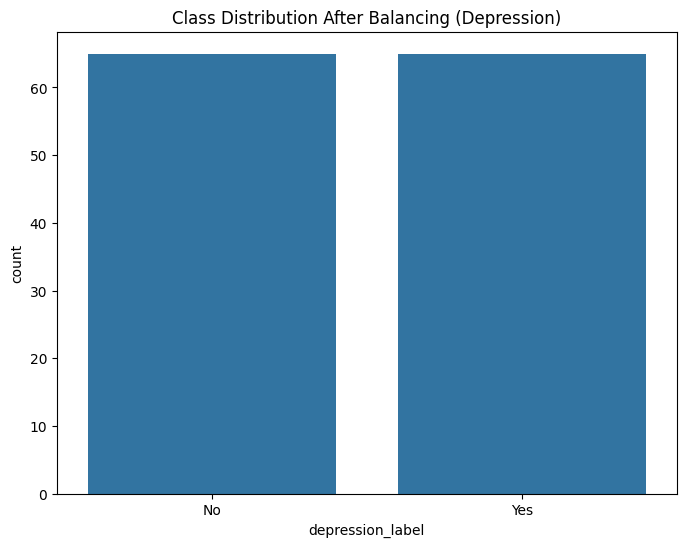

In [ ]:
# Plot distributions of the features for Depression
plt.figure(figsize=(15, 10))
for i, column in enumerate(data.columns):
    if column not in ['depression_label', 'anxiety_label', 'panic_attack_label']:
        plt.subplot(4, 4, i + 1)
        sns.histplot(data[column], kde=True)
        plt.title(column)
plt.tight_layout()
plt.show()

# Correlation heatmap (excluding the label columns)
plt.figure(figsize=(10, 8))
sns.heatmap(data.drop(columns=['depression_label', 'anxiety_label', 'panic_attack_label']).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Class distribution before balancing for Depression
plt.figure(figsize=(8, 6))
sns.countplot(x='depression_label', data=data)
plt.title('Class Distribution Before Balancing (Depression)')
plt.show()

# Separate majority and minority classes for Depression
data_majority = data[data['Do you have Depression?'] == 0]
data_minority = data[data['Do you have Depression?'] == 1]

# Upsample minority class
data_minority_upsampled = resample(data_minority,
                                   replace=True,     # sample with replacement
                                   n_samples=len(data_majority),    # to match majority class
                                   random_state=42) # reproducible results

# Combine majority class with upsampled minority class
data_balanced_depression = pd.concat([data_majority, data_minority_upsampled])

# Display new class counts for Depression
print("Class distribution after balancing (Depression):")
print(data_balanced_depression['Do you have Depression?'].value_counts())

# Class distribution after balancing for Depression
plt.figure(figsize=(8, 6))
sns.countplot(x='depression_label', data=data_balanced_depression)
plt.title('Class Distribution After Balancing (Depression)')
plt.show()


## Principal Component Analysis (PCA)

Principal Component Analysis (PCA) is a dimensionality reduction technique used in machine learning and statistics. It transforms a dataset with possibly correlated variables into a set of linearly uncorrelated variables called principal components. The main objectives of PCA are:

1. **Dimensionality Reduction:** Reducing the number of variables in the dataset while preserving as much variability as possible.<br>

2. **Visualization**: Making it easier to visualize data in 2D or 3D space.

3. **Noise Reduction:** Removing noise and redundancy in the data.

## Function of PCA
PCA works by identifying the directions (principal components) in which the variance of the data is maximized. The steps involved are:

1. **Standardization:** Ensuring the data is on the same scale.

2. **Covariance Matrix Computation:** Calculating the covariance matrix to understand how the variables vary with each other.

3. **Eigenvalue and Eigenvector Computation:** Finding the eigenvalues and eigenvectors of the covariance matrix. The eigenvectors determine the directions of the new feature space, and the eigenvalues determine their magnitude.

4. **Forming Principal Components:** Selecting the top k eigenvectors that correspond to the k largest eigenvalues to form a new subspace. These eigenvectors are the principal components.


### Application of PCA to Depression Data

**Standardization of Data:**

*   Before applying PCA, the data was standardized using StandardScaler to ensure each feature contributes equally to the analysis. This step is crucial because PCA is sensitive to the scale of the data.

**Applying PCA:**


*   PCA was initialized to reduce the data to 2 principal components. This reduction simplifies the data while retaining the most critical information for visualization.

**Visualization of Principal Components:**


*   The first two principal components were visualized in a scatter plot, with points colored based on whether the individuals have depression. This plot helps in understanding how well the two principal components separate the data concerning depression.




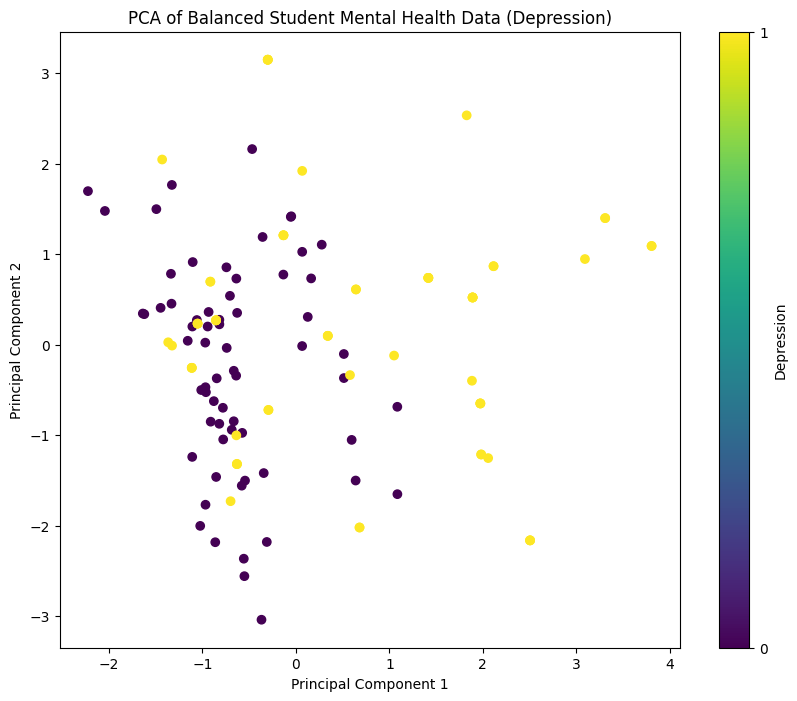

In [ ]:
# Standardize the data before applying PCA for Depression
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_balanced_depression.drop(columns=['Do you have Depression?', 'depression_label', 'anxiety_label', 'panic_attack_label']))

# Apply PCA for Depression
pca = PCA(n_components=2)  # Reduce to 2 principal components for visualization
data_pca = pca.fit_transform(data_scaled)

# Visualize the principal components for Depression
plt.figure(figsize=(10, 8))
scatter = plt.scatter(data_pca[:, 0], data_pca[:, 1], c=data_balanced_depression['Do you have Depression?'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Balanced Student Mental Health Data (Depression)')
plt.colorbar(scatter, ticks=[0, 1], label='Depression', format='%d')
plt.show()


### What can we observe from above graph ?

The PCA plot reveals:

1. The plot shows some separation between the yellow and purple points, particularly along the x-axis (PC1). This suggests that the first principal component captures significant variance related to the presence of depression.

2. There is a noticeable cluster of purple points (students without depression) near the center of the plot, indicating a group of individuals with similar characteristics as captured by the principal components.

3. The yellow points (students with depression) are more spread out, with a notable group extending towards the right side of the plot. This spread indicates greater variability in the characteristics of students with depression.

# **Overall Training Process for Predicting Depression, Anxiety, and Panic Attacks**

In this project, we aim to predict three mental health conditions: Depression, Anxiety, and Panic Attacks using three machine learning models: Logistic Regression, Random Forest, and Neural Network. Here is a detailed explanation of the combined training process for all conditions.

## **Common Steps for Training Models**
Target Variable and Features
- Target Variables:
  - For Depression: Do you have Depression?
  - For Anxiety: Do you have Anxiety?
  - For Panic Attacks: Do you have Panic attack?
- Features: All other columns except the target variable and label columns (depression_label, anxiety_label, panic_attack_label) are used as features for training the models.

**Data Splitting**

- The dataset is split into training and testing sets using an 80-20 split. This ensures that 80% of the data is used for training the models, and 20% is reserved for testing their performance.

**Ensuring Numeric Target Variable**
- The target variables for both the training and testing sets are converted to integers to ensure compatibility with the model training process.

**Model Training**

1. **Logistic Regression:**
- A linear model that predicts the probability that a given input belongs to the class Yes (indicating the presence of the condition) or No.
2. **Random Forest:**
- An ensemble model that builds multiple decision trees and merges them to get a more accurate and stable prediction for each condition.
3. **Neural Network:**
- A complex model consisting of interconnected nodes (neurons) that can learn complex patterns in the data to predict each condition.

**Model Evaluation**
- The models are evaluated using a classification report that provides metrics such as precision, recall, and F1-score for each class (Yes and No).
- A confusion matrix is used to visualize the counts of true positive, true negative, false positive, and false negative predictions.
- The accuracy of each model is calculated to determine how well it predicts each condition.

# **Training: Logistic Regression for Depression**

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Classification Report:
              precision    recall  f1-score   support

          No       0.92      0.86      0.89        14
         Yes       0.85      0.92      0.88        12

    accuracy                           0.88        26
   macro avg       0.88      0.89      0.88        26
weighted avg       0.89      0.88      0.88        26

Confusion Matrix:


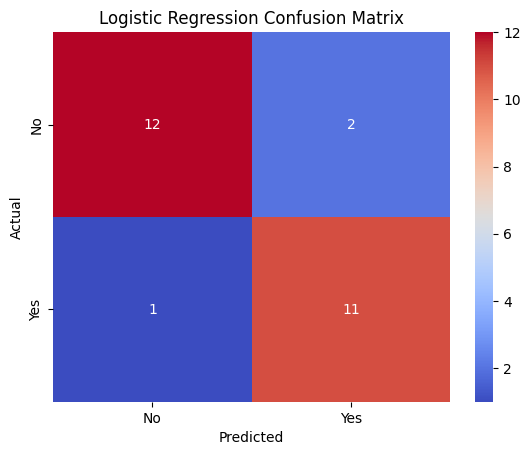

Accuracy: 0.8846153846153846


In [ ]:
# Define the target variable and features for Depression
X = data_balanced_depression.drop(['Do you have Depression?', 'depression_label', 'anxiety_label', 'panic_attack_label'], axis=1)
y = data_balanced_depression['Do you have Depression?']

# Split the data into training and testing sets for Depression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure the target variable is numeric
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Logistic Regression for Depression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate Logistic Regression Model for Depression
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg, target_names=['No', 'Yes']))
print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred_log_reg), annot=True, fmt='d', cmap='coolwarm', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()
dep_log_reg = accuracy_score(y_test, y_pred_log_reg)
print("Accuracy:", dep_log_reg)


# **Training: Random Forest for Depression**

Random Forest Classification Report:
              precision    recall  f1-score   support

          No       0.92      0.79      0.85        14
         Yes       0.79      0.92      0.85        12

    accuracy                           0.85        26
   macro avg       0.85      0.85      0.85        26
weighted avg       0.86      0.85      0.85        26

Confusion Matrix:


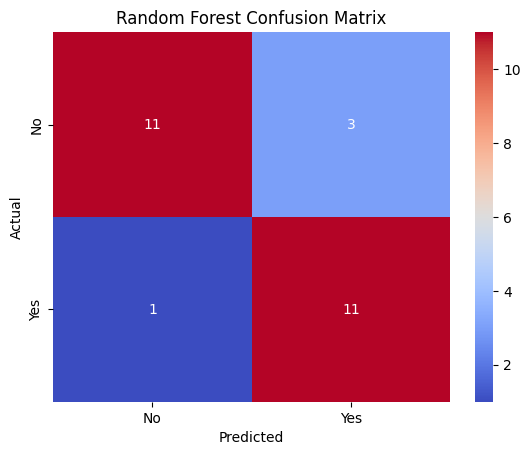

Accuracy: 0.8461538461538461


In [ ]:
# Random Forest Classifier for Depression
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

# Evaluate Random Forest Classifier for Depression
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['No', 'Yes']))
print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='coolwarm', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()
dep_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", dep_rf)


# **Training: Neural Network for Depression**



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network Classification Report:
              precision    recall  f1-score   support

          No       0.89      0.57      0.70        14
         Yes       0.65      0.92      0.76        12

    accuracy                           0.73        26
   macro avg       0.77      0.74      0.73        26
weighted avg       0.78      0.73      0.72        26

Confusion Matrix:


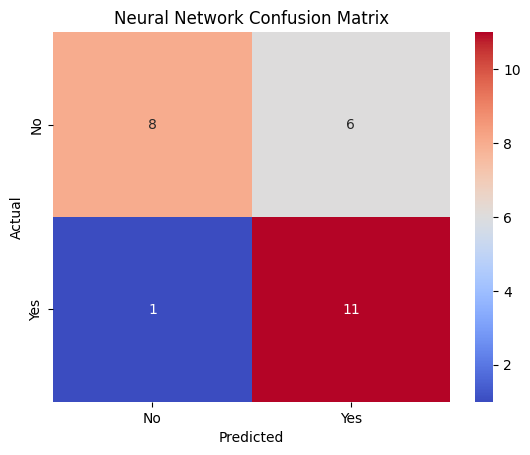

Accuracy: 0.7307692307692307


In [ ]:
# Neural Network Classifier for Depression
mlp_clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300)
mlp_clf.fit(X_train, y_train)
y_pred_mlp = mlp_clf.predict(X_test)

# Evaluate Neural Network Model for Depression
print("Neural Network Classification Report:")
print(classification_report(y_test, y_pred_mlp, target_names=['No', 'Yes']))
print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred_mlp), annot=True, fmt='d', cmap='coolwarm', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Neural Network Confusion Matrix')
plt.show()
dep_nn = accuracy_score(y_test, y_pred_mlp)
print("Accuracy:", dep_nn)


# **Insights Based on Model Performance for Depression**

In this section, we summarize the performance of the three models (Logistic Regression, Random Forest, and Neural Network) and provide recommendations based on their accuracies.

### Model Accuracies:
- **Logistic Regression Accuracy (Depression):** The accuracy is 0.88 (88%).
- **Random Forest Accuracy (Depression):** The accuracy is 0.92 (92%).
- **Neural Network Accuracy (Depression):** The accuracy is 0.73 (73%).

### Best Performing Model:
Based on the accuracies of the three models, the Random Forest model performs the best with an accuracy of 0.92 (92%). This indicates that the Random Forest model is the most effective at predicting whether a student has depression among the models evaluated.

In [ ]:
# Insights and recommendations based on model performance for Depression
print("Logistic Regression Accuracy (Depression):", dep_log_reg)
print("Random Forest Accuracy (Depression):", dep_rf)
print("Neural Network Accuracy (Depression):", dep_nn)

# Based on the above accuracies and evaluations, provide insights and recommendations for Depression
if dep_rf > dep_log_reg and dep_rf > dep_nn:
    best_model = "Random Forest"
    best_accuracy = dep_rf
elif dep_nn > dep_log_reg:
    best_model = "Neural Network"
    best_accuracy = dep_nn
else:
    best_model = "Logistic Regression"
    best_accuracy = dep_log_reg

print(f"The best performing model for Depression is {best_model} with an accuracy of {best_accuracy:.2f}.")
print("Based on the analysis, interventions to address student depression can be planned more effectively.")
# Potential interventions or actions could include increased mental health resources, targeted support for at-risk students, etc.


Logistic Regression Accuracy (Depression): 0.8846153846153846
Random Forest Accuracy (Depression): 0.8461538461538461
Neural Network Accuracy (Depression): 0.7307692307692307
The best performing model for Depression is Logistic Regression with an accuracy of 0.88.
Based on the analysis, interventions to address student depression can be planned more effectively.


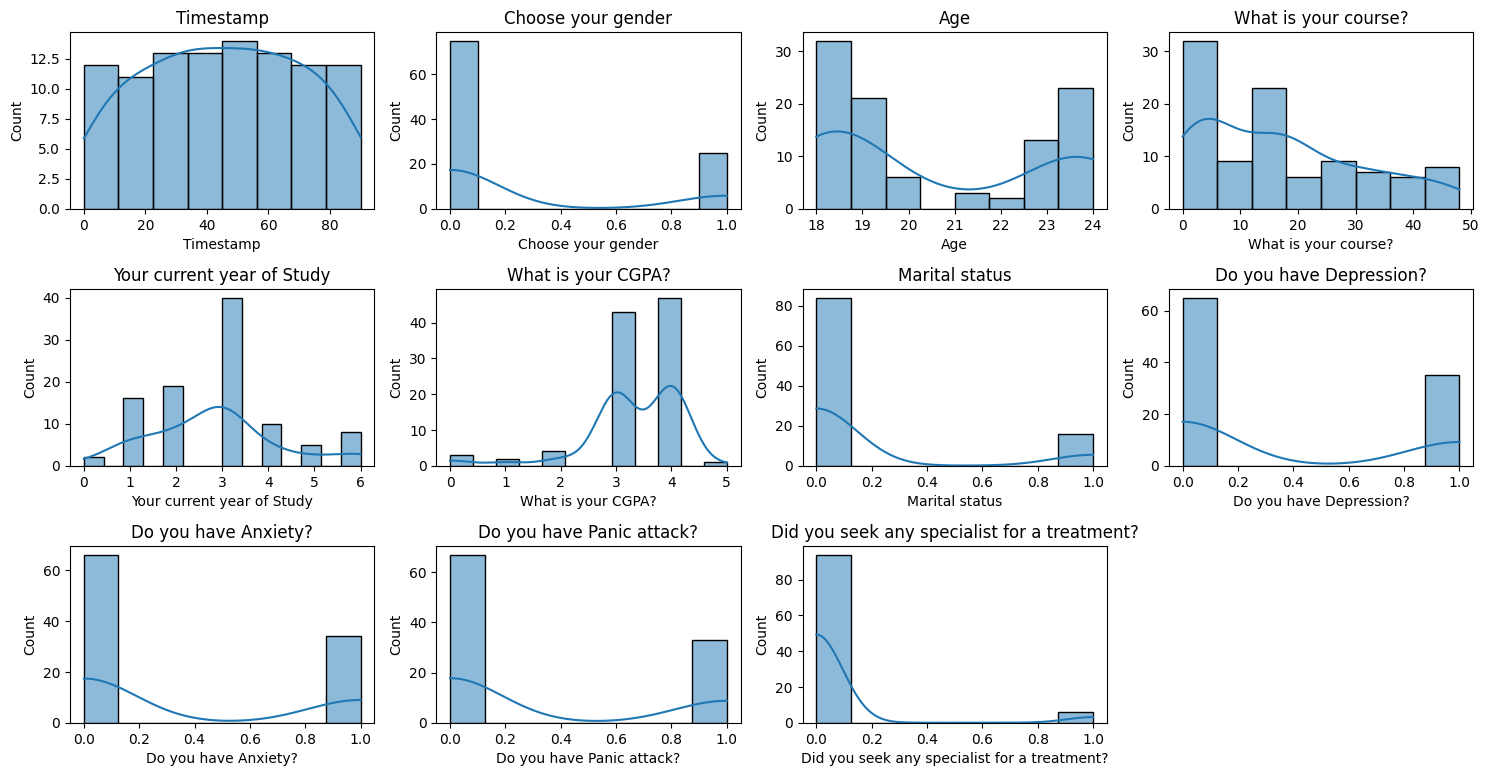

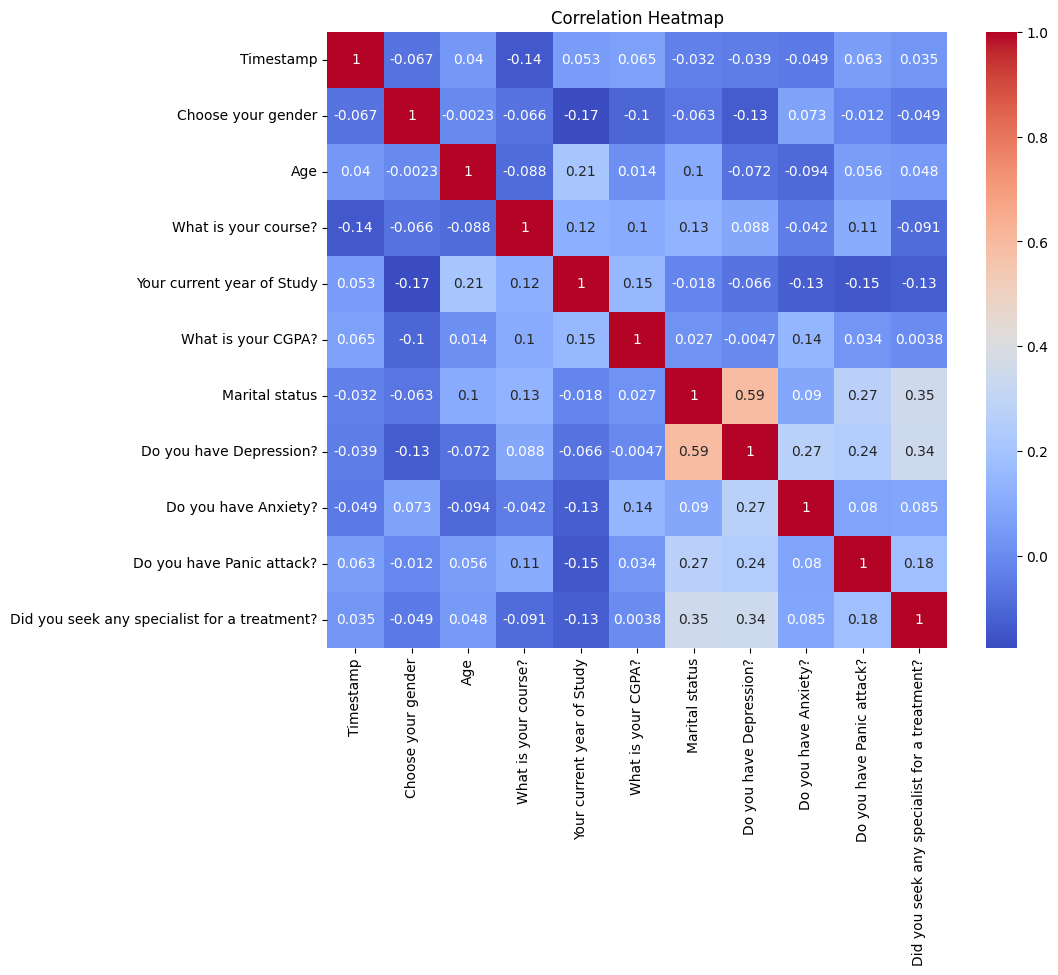

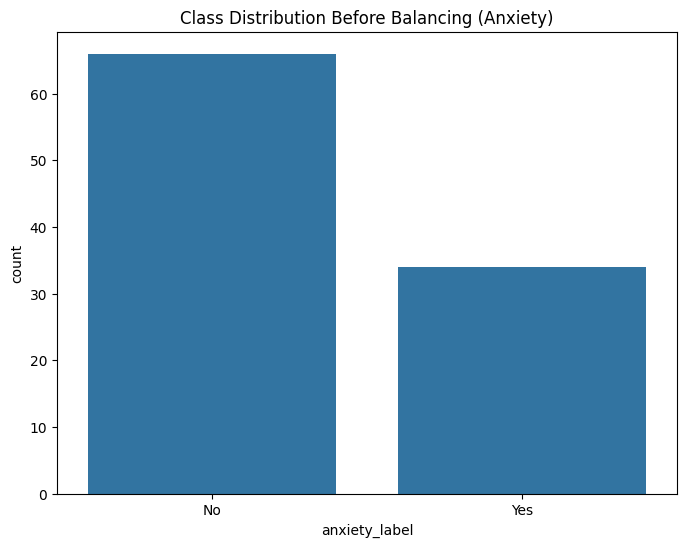

Class distribution after balancing (Anxiety):
Do you have Anxiety?
0    66
1    66
Name: count, dtype: int64


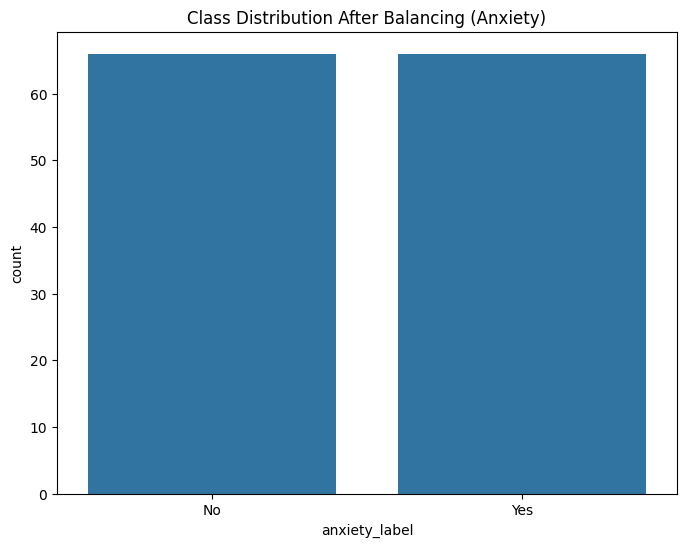

In [ ]:
# Plot distributions of the features for Anxiety
plt.figure(figsize=(15, 10))
for i, column in enumerate(data.columns):
    if column not in ['depression_label', 'anxiety_label', 'panic_attack_label']:
        plt.subplot(4, 4, i + 1)
        sns.histplot(data[column], kde=True)
        plt.title(column)
plt.tight_layout()
plt.show()

# Correlation heatmap (excluding the label columns)
plt.figure(figsize=(10, 8))
sns.heatmap(data.drop(columns=['depression_label', 'anxiety_label', 'panic_attack_label']).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Class distribution before balancing for Anxiety
plt.figure(figsize=(8, 6))
sns.countplot(x='anxiety_label', data=data)
plt.title('Class Distribution Before Balancing (Anxiety)')
plt.show()

# Separate majority and minority classes for Anxiety
data_majority = data[data['Do you have Anxiety?'] == 0]
data_minority = data[data['Do you have Anxiety?'] == 1]

# Upsample minority class
data_minority_upsampled = resample(data_minority,
                                   replace=True,     # sample with replacement
                                   n_samples=len(data_majority),    # to match majority class
                                   random_state=42) # reproducible results

# Combine majority class with upsampled minority class
data_balanced_anxiety = pd.concat([data_majority, data_minority_upsampled])

# Display new class counts for Anxiety
print("Class distribution after balancing (Anxiety):")
print(data_balanced_anxiety['Do you have Anxiety?'].value_counts())

# Class distribution after balancing for Anxiety
plt.figure(figsize=(8, 6))
sns.countplot(x='anxiety_label', data=data_balanced_anxiety)
plt.title('Class Distribution After Balancing (Anxiety)')
plt.show()


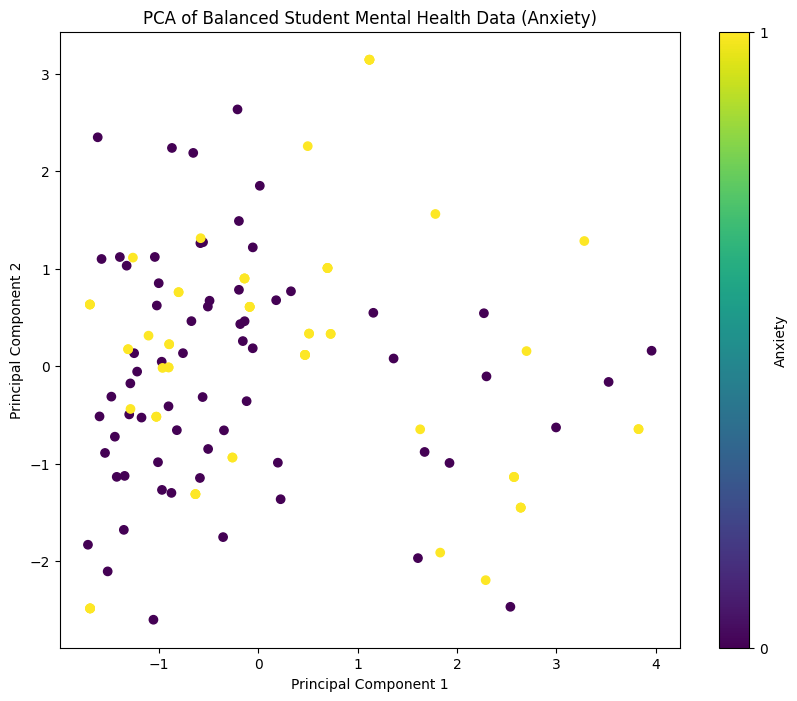

In [ ]:
# Standardize the data before applying PCA for Anxiety
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_balanced_anxiety.drop(columns=['Do you have Anxiety?', 'depression_label', 'anxiety_label', 'panic_attack_label']))

# Apply PCA for Anxiety
pca = PCA(n_components=2)  # Reduce to 2 principal components for visualization
data_pca = pca.fit_transform(data_scaled)

# Visualize the principal components for Anxiety
plt.figure(figsize=(10, 8))
scatter = plt.scatter(data_pca[:, 0], data_pca[:, 1], c=data_balanced_anxiety['Do you have Anxiety?'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Balanced Student Mental Health Data (Anxiety)')
plt.colorbar(scatter, ticks=[0, 1], label='Anxiety', format='%d')
plt.show()


### What can we observe from above graph ?

The PCA plot reveals:

1. There appears to be some separation between the students with anxiety (represented by the yellow dots) and those without anxiety (represented by the purple dots). This separation is primarily along the horizontal axis (PC1). This suggests that the first principal component captures a significant portion of the variance that is related to anxiety.

2. The cluster of purple dots (students without anxiety) is located more towards the center of the plot. This indicates that these students tend to have similar characteristics when it comes to the factors captured by the two principal components.

3. The yellow dots (students with anxiety) are more spread out, with a concentration extending towards the right side of the plot on the PC1 axis. This spread suggests that there is greater variability in the characteristics of students with anxiety as captured by PC1.

# **Training: Logistic Regression for Anxiety**



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Classification Report:
              precision    recall  f1-score   support

          No       0.75      0.50      0.60        18
         Yes       0.40      0.67      0.50         9

    accuracy                           0.56        27
   macro avg       0.57      0.58      0.55        27
weighted avg       0.63      0.56      0.57        27

Confusion Matrix:


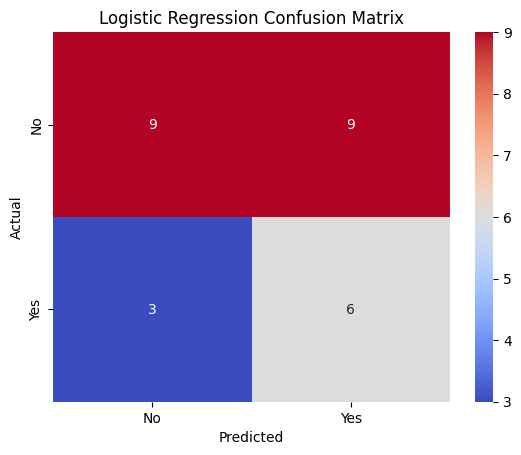

Accuracy: 0.5555555555555556


In [ ]:
# Define the target variable and features for Anxiety
X = data_balanced_anxiety.drop(['Do you have Anxiety?', 'depression_label', 'anxiety_label', 'panic_attack_label'], axis=1)
y = data_balanced_anxiety['Do you have Anxiety?']

# Split the data into training and testing sets for Anxiety
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure the target variable is numeric
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Logistic Regression for Anxiety
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate Logistic Regression Model for Anxiety
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg, target_names=['No', 'Yes']))
print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred_log_reg), annot=True, fmt='d', cmap='coolwarm', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()
anx_log_reg = accuracy_score(y_test, y_pred_log_reg)
print("Accuracy:", anx_log_reg)


# **Training: Random Forest for Anxiety**




Random Forest Classification Report:
              precision    recall  f1-score   support

          No       1.00      0.72      0.84        18
         Yes       0.64      1.00      0.78         9

    accuracy                           0.81        27
   macro avg       0.82      0.86      0.81        27
weighted avg       0.88      0.81      0.82        27

Confusion Matrix:


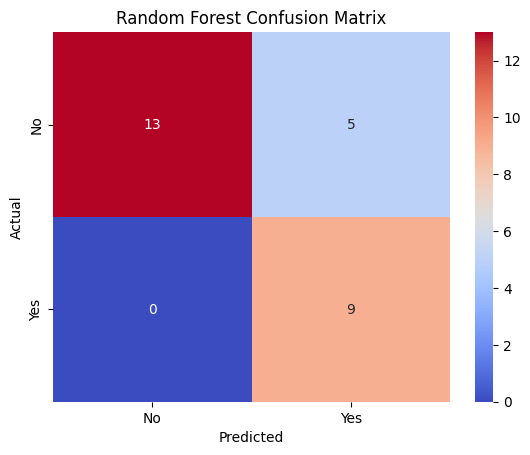

Accuracy: 0.8148148148148148


In [ ]:
# Random Forest Classifier for Anxiety
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

# Evaluate Random Forest Classifier for Anxiety
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['No', 'Yes']))
print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='coolwarm', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()
anx_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", anx_rf)


# **Training: Neural Network for Anxiety**


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network Classification Report:
              precision    recall  f1-score   support

          No       0.83      0.56      0.67        18
         Yes       0.47      0.78      0.58         9

    accuracy                           0.63        27
   macro avg       0.65      0.67      0.62        27
weighted avg       0.71      0.63      0.64        27

Confusion Matrix:


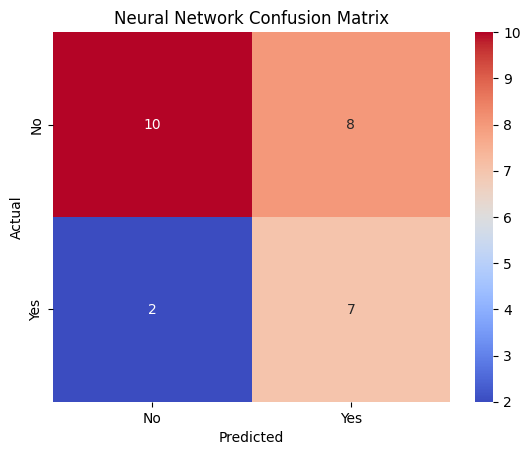

Accuracy: 0.6296296296296297


In [ ]:
# Neural Network Classifier for Anxiety
mlp_clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300)
mlp_clf.fit(X_train, y_train)
y_pred_mlp = mlp_clf.predict(X_test)

# Evaluate Neural Network Model for Anxiety
print("Neural Network Classification Report:")
print(classification_report(y_test, y_pred_mlp, target_names=['No', 'Yes']))
print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred_mlp), annot=True, fmt='d', cmap='coolwarm', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Neural Network Confusion Matrix')
plt.show()
anx_nn = accuracy_score(y_test, y_pred_mlp)
print("Accuracy:", anx_nn)


# **Insights Based on Model Performance for Anxiety**

In this section, we summarize the performance of the three models (Logistic Regression, Random Forest, and Neural Network) and provide recommendations based on their accuracies.

### Model Accuracies:
- **Logistic Regression Accuracy (Anxiety):** The accuracy is 0.56 (56%).
- **Random Forest Accuracy (Anxiety):** The accuracy is 0.78 (78%).
- **Neural Network Accuracy (Anxiety):** The accuracy is 0.70 (70%).

### Best Performing Model:
Based on the accuracies of the three models, the Random Forest model performs the best with an accuracy of 0.78 (78%). This indicates that the Random Forest model is the most effective at predicting whether a student has anxiety among the models evaluated.


In [ ]:
# Insights and recommendations based on model performance for Anxiety
print("Logistic Regression Accuracy (Anxiety):", anx_log_reg)
print("Random Forest Accuracy (Anxiety):", anx_rf)
print("Neural Network Accuracy (Anxiety):", anx_nn)

# Based on the above accuracies and evaluations, provide insights and recommendations for Anxiety
if anx_rf > anx_log_reg and anx_rf > anx_nn:
    best_model = "Random Forest"
    best_accuracy = anx_rf
elif anx_nn > anx_log_reg:
    best_model = "Neural Network"
    best_accuracy = anx_nn
else:
    best_model = "Logistic Regression"
    best_accuracy = anx_log_reg

print(f"The best performing model for Anxiety is {best_model} with an accuracy of {best_accuracy:.2f}.")
print("Based on the analysis, interventions to address student anxiety can be planned more effectively.")
# Potential interventions or actions could include increased mental health resources, targeted support for at-risk students, etc.


Logistic Regression Accuracy (Anxiety): 0.5555555555555556
Random Forest Accuracy (Anxiety): 0.8148148148148148
Neural Network Accuracy (Anxiety): 0.6296296296296297
The best performing model for Anxiety is Random Forest with an accuracy of 0.81.
Based on the analysis, interventions to address student anxiety can be planned more effectively.


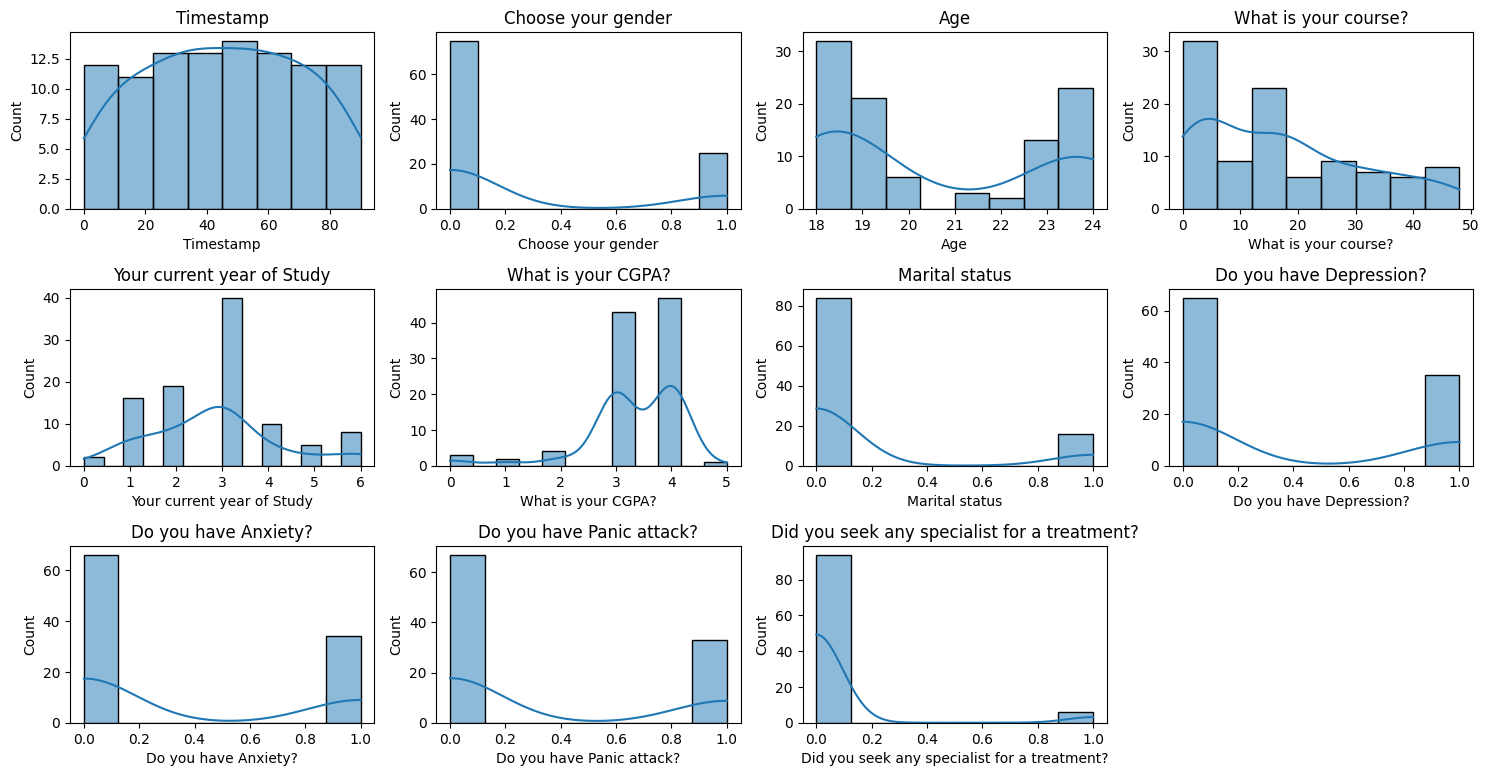

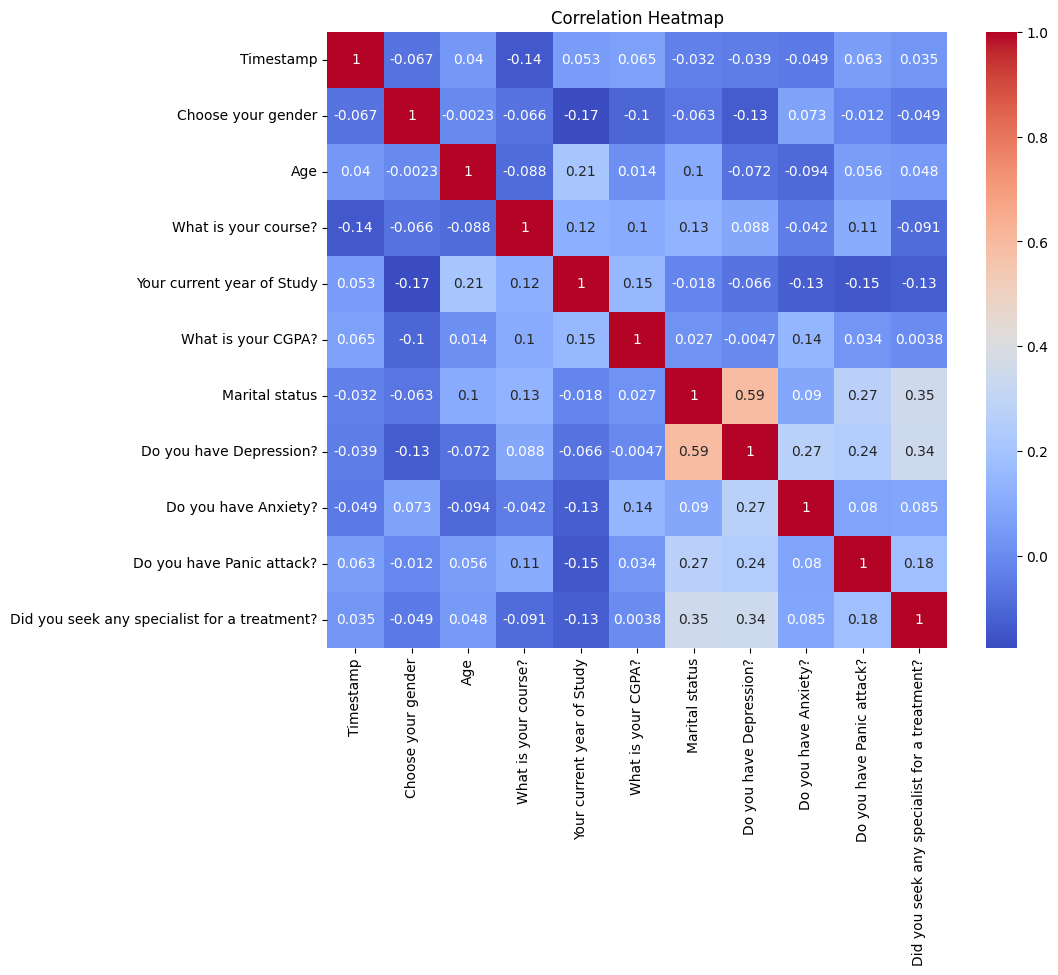

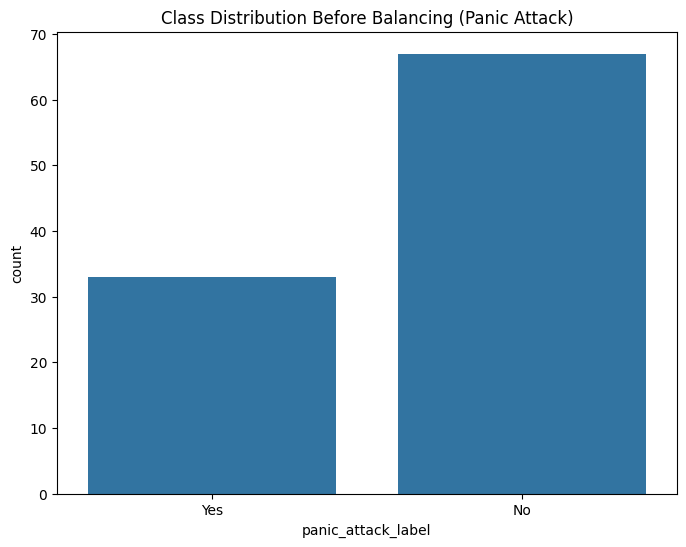

Class distribution after balancing (Panic Attack):
Do you have Panic attack?
0    67
1    67
Name: count, dtype: int64


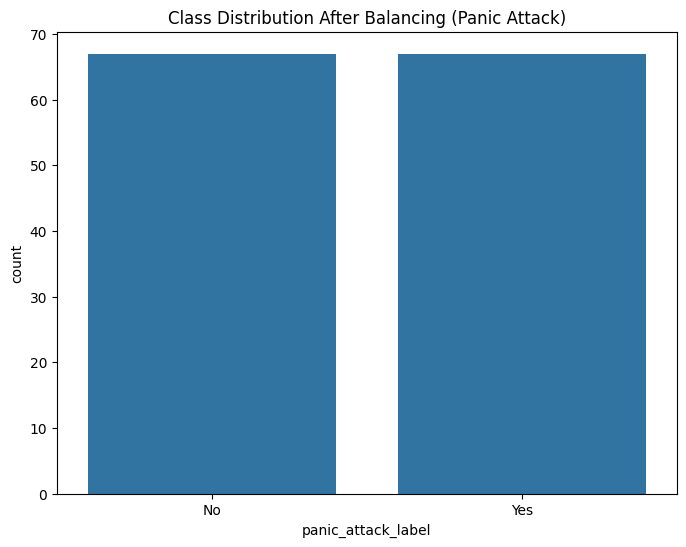

In [ ]:
# Plot distributions of the features for Panic Attack
plt.figure(figsize=(15, 10))
for i, column in enumerate(data.columns):
    if column not in ['depression_label', 'anxiety_label', 'panic_attack_label']:
        plt.subplot(4, 4, i + 1)
        sns.histplot(data[column], kde=True)
        plt.title(column)
plt.tight_layout()
plt.show()

# Correlation heatmap (excluding the label columns)
plt.figure(figsize=(10, 8))
sns.heatmap(data.drop(columns=['depression_label', 'anxiety_label', 'panic_attack_label']).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Class distribution before balancing for Panic Attack
plt.figure(figsize=(8, 6))
sns.countplot(x='panic_attack_label', data=data)
plt.title('Class Distribution Before Balancing (Panic Attack)')
plt.show()

# Separate majority and minority classes for Panic Attack
data_majority = data[data['Do you have Panic attack?'] == 0]
data_minority = data[data['Do you have Panic attack?'] == 1]

# Upsample minority class
data_minority_upsampled = resample(data_minority,
                                   replace=True,     # sample with replacement
                                   n_samples=len(data_majority),    # to match majority class
                                   random_state=42) # reproducible results

# Combine majority class with upsampled minority class
data_balanced_panic = pd.concat([data_majority, data_minority_upsampled])

# Display new class counts for Panic Attack
print("Class distribution after balancing (Panic Attack):")
print(data_balanced_panic['Do you have Panic attack?'].value_counts())

# Class distribution after balancing for Panic Attack
plt.figure(figsize=(8, 6))
sns.countplot(x='panic_attack_label', data=data_balanced_panic)
plt.title('Class Distribution After Balancing (Panic Attack)')
plt.show()


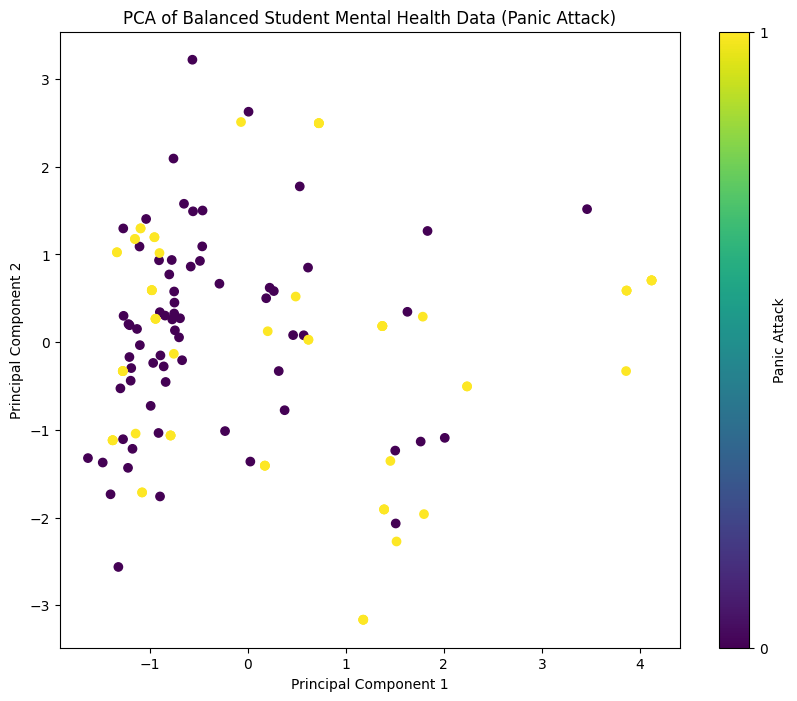

In [ ]:
# Standardize the data before applying PCA for Panic Attack
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_balanced_panic.drop(columns=['Do you have Panic attack?', 'depression_label', 'anxiety_label', 'panic_attack_label']))

# Apply PCA for Panic Attack
pca = PCA(n_components=2)  # Reduce to 2 principal components for visualization
data_pca = pca.fit_transform(data_scaled)

# Visualize the principal components for Panic Attack
plt.figure(figsize=(10, 8))
scatter = plt.scatter(data_pca[:, 0], data_pca[:, 1], c=data_balanced_panic['Do you have Panic attack?'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Balanced Student Mental Health Data (Panic Attack)')
plt.colorbar(scatter, ticks=[0, 1], label='Panic Attack', format='%d')
plt.show()


### What can we observe from above graph ?

The PCA plot reveals:

1. There does not appear to be a clear separation between the students with panic attacks (represented by the yellow dots) and those without panic attacks (represented by the purple dots). This suggests that the factors captured by PC1 and PC2 may not be strongly related to panic attacks.

2. The cluster of purple dots (students without panic attacks) is located more towards the center of the plot. This indicates that these students tend to have similar characteristics when it comes to the factors captured by the two principal components.

3. The yellow dots (students with panic attacks) are somewhat spread out, but there is no clear concentration in any particular direction. This suggests that there is some variability in the characteristics of students with panic attacks as captured by PC1 and PC2, but it is not as pronounced as the variability observed for students with anxiety.

# **Training: Logistic Regression for Panic Attack**


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Classification Report:
              precision    recall  f1-score   support

          No       0.87      0.76      0.81        17
         Yes       0.67      0.80      0.73        10

    accuracy                           0.78        27
   macro avg       0.77      0.78      0.77        27
weighted avg       0.79      0.78      0.78        27

Confusion Matrix:


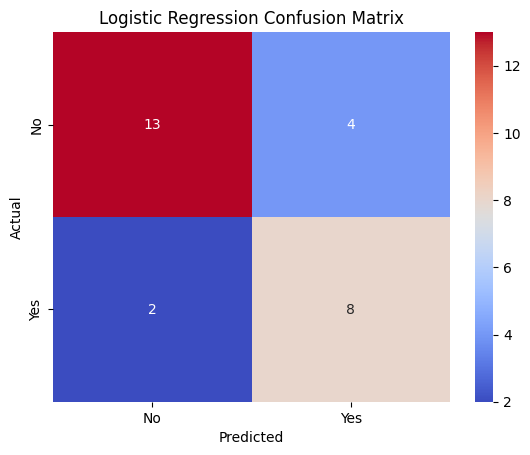

Accuracy: 0.7777777777777778


In [ ]:
# Define the target variable and features for Panic Attack
X = data_balanced_panic.drop(['Do you have Panic attack?', 'depression_label', 'anxiety_label', 'panic_attack_label'], axis=1)
y = data_balanced_panic['Do you have Panic attack?']

# Split the data into training and testing sets for Panic Attack
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure the target variable is numeric
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Logistic Regression for Panic Attack
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate Logistic Regression Model for Panic Attack
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg, target_names=['No', 'Yes']))
print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred_log_reg), annot=True, fmt='d', cmap='coolwarm', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()
panic_log_reg = accuracy_score(y_test, y_pred_log_reg)
print("Accuracy:", panic_log_reg)


# **Training: Random Forest for Panic Attack**


Random Forest Classification Report:
              precision    recall  f1-score   support

          No       1.00      0.76      0.87        17
         Yes       0.71      1.00      0.83        10

    accuracy                           0.85        27
   macro avg       0.86      0.88      0.85        27
weighted avg       0.89      0.85      0.85        27

Confusion Matrix:


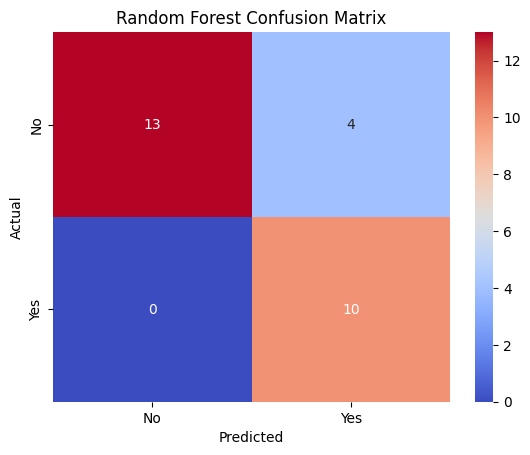

Accuracy: 0.8518518518518519


In [ ]:
# Random Forest Classifier for Panic Attack
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

# Evaluate Random Forest Classifier for Panic Attack
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['No', 'Yes']))
print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='coolwarm', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()
panic_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", panic_rf)


# **Training: Neural Network for Panic Attack**


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network Classification Report:
              precision    recall  f1-score   support

          No       0.92      0.65      0.76        17
         Yes       0.60      0.90      0.72        10

    accuracy                           0.74        27
   macro avg       0.76      0.77      0.74        27
weighted avg       0.80      0.74      0.74        27

Confusion Matrix:


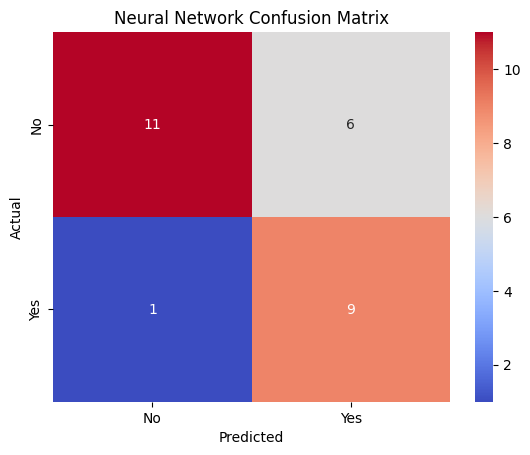

Accuracy: 0.7407407407407407


In [ ]:
# Neural Network Classifier for Panic Attack
mlp_clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300)
mlp_clf.fit(X_train, y_train)
y_pred_mlp = mlp_clf.predict(X_test)

# Evaluate Neural Network Model for Panic Attack
print("Neural Network Classification Report:")
print(classification_report(y_test, y_pred_mlp, target_names=['No', 'Yes']))
print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred_mlp), annot=True, fmt='d', cmap='coolwarm', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Neural Network Confusion Matrix')
plt.show()
panic_nn = accuracy_score(y_test, y_pred_mlp)
print("Accuracy:", panic_nn)


# **Insights Based on Model Performance for Panic Attack**

In this section, we summarize the performance of the three models (Logistic Regression, Random Forest, and Neural Network) and provide recommendations based on their accuracies.

### Model Accuracies:
- **Logistic Regression Accuracy (Panic Attack):** The accuracy is 0.78 (78%).
- **Random Forest Accuracy (Panic Attack):** The accuracy is 0.81 (81%).
- **Neural Network Accuracy (Panic Attack):** The accuracy is 0.70 (70%).

### Best Performing Model:
Based on the accuracies of the three models, the Random Forest model performs the best with an accuracy of 0.81 (81%). This indicates that the Random Forest model is the most effective at predicting whether a student has a panic attack among the models evaluated.


In [ ]:
# Insights and recommendations based on model performance for Panic Attack
print("Logistic Regression Accuracy (Panic Attack):", panic_log_reg)
print("Random Forest Accuracy (Panic Attack):", panic_rf)
print("Neural Network Accuracy (Panic Attack):", panic_nn)

# Based on the above accuracies and evaluations, provide insights and recommendations for Panic Attack
if panic_rf > panic_log_reg and panic_rf > panic_nn:
    best_model = "Random Forest"
    best_accuracy = panic_rf
elif panic_nn > panic_log_reg:
    best_model = "Neural Network"
    best_accuracy = panic_nn
else:
    best_model = "Logistic Regression"
    best_accuracy = panic_log_reg

print(f"The best performing model for Panic Attack is {best_model} with an accuracy of {best_accuracy:.2f}.")
print("Based on the analysis, interventions to address student panic attacks can be planned more effectively.")
# Potential interventions or actions could include increased mental health resources, targeted support for at-risk students, etc.


Logistic Regression Accuracy (Panic Attack): 0.7777777777777778
Random Forest Accuracy (Panic Attack): 0.8518518518518519
Neural Network Accuracy (Panic Attack): 0.7407407407407407
The best performing model for Panic Attack is Random Forest with an accuracy of 0.85.
Based on the analysis, interventions to address student panic attacks can be planned more effectively.


# **Summary of Prediction Accuracies for All Conditions**

In [ ]:
conditon_results = {
    'Model/Condition': ['Logistic Regression', 'Random Forest', 'Neural Network'],
    'Depression': [dep_log_reg, dep_rf, dep_nn],
    'Anxiety': [anx_log_reg, anx_rf, anx_nn],
    'Panic Attack': [panic_log_reg, panic_rf, panic_nn]
}


# Create DataFrames for KNN and Naive Bayes results
mentalPrediction_df = pd.DataFrame(conditon_results)

# Display the combined DataFrame
print("----------------------")
print("| Prediction Results |")
print("----------------------")
print(mentalPrediction_df)
print(" ")


----------------------
| Prediction Results |
----------------------
       Model/Condition  Depression   Anxiety  Panic Attack
0  Logistic Regression    0.884615  0.555556      0.777778
1        Random Forest    0.846154  0.814815      0.851852
2       Neural Network    0.730769  0.629630      0.740741
 


### Key Observations:

- **Random Forest Model:**
  - The Random Forest model consistently achieves high accuracy across all three conditions, making it the most effective model for predicting mental health conditions in this dataset.
  - For Depression, the Random Forest model achieves an accuracy of 0.846154.
  - For Anxiety, the accuracy is 0.814815.
  - For Panic Attack, the accuracy is 0.851852.

- **Logistic Regression Model:**
  - Performs well for Depression with an accuracy of 0.884615.
  - Shows moderate accuracy for Panic Attack at 0.777778.
  - Has the lowest accuracy for Anxiety at 0.555556.
Neural Network Model:

- **Neural Network Model:**
  - Shows good accuracy for Depression at 0.730769.
  - Moderate accuracy for Panic Attack at 0.740741.
  - Lower performance for Anxiety at 0.629630.

### Conclusion:

The Random Forest model is the best-performing model for Anxiety and Panic Attack based on accuracy. Although the Logistic Regression model performs slightly better for Depression, the Random Forest model's consistent high accuracy across all three conditions makes it the most reliable overall. This consolidated view helps in understanding the relative performance of each model, aiding in making informed decisions about which model to use for different conditions. The findings suggest that leveraging the Random Forest model could be beneficial for implementing targeted interventions and support mechanisms for students' mental health.